In [ ]:
import numpy as np
import math as m

In [ ]:
points = []

E0 = 0.1
N = 300;
allNum = N * 2

In [ ]:
def get_xor_label(p):
  return 1 if p["x"] * p["y"] >= 0 else -1

def genXor():
  len = 4
  for _ in range(allNum):
    x = np.random.uniform(-len, len)
    padding = 0.3
    x += padding if x > 0 else -padding
    y = np.random.uniform(-len, len)
    y += padding if y > 0 else -padding
    eps = np.random.uniform(-E0, E0)
    label = get_xor_label({"x": x + eps, "y": y + eps})
    points.append({"x": x + eps, "y": y + eps, "label": label})


In [ ]:
def genSpiral(deltaT, label):
  for i in range(N):
    r = i / N * 5
    t = 1.75 * i / N * 2 * np.pi + deltaT
    eps = np.random.uniform(-E0, E0)
    x = r * np.sin(t) + eps
    y = r * np.cos(t) + eps
    points.append({"x": x, "y": y, "label": label})


In [ ]:
def genGauss(cx, cy, label):
  for i in range(N):
    x = np.random.normal(cx, E0)
    y = np.random.normal(cy, E0)
    points.append({"x": x, "y": y, "label": label})

In [ ]:
genXor()

In [ ]:
genSpiral(0, 1)
genSpiral(np.pi, -1)

In [ ]:
genGauss(2, 2, 1)
genGauss(-2, -2, -1)

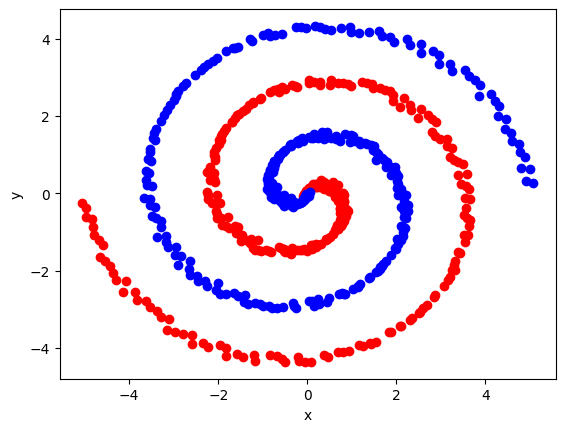

In [ ]:
import matplotlib.pyplot as plt

def getCoords(p, label, coord):
  arr =[]
  for i in range(allNum):
    if p[i]["label"] == label:
      arr.append(p[i][coord])
  return arr

#plt.ylim(-1, 1)

plt.scatter(getCoords(points, 1, "x"), getCoords(points, 1, "y"), color='red')
plt.scatter(getCoords(points, -1, "x"), getCoords(points, -1, "y"), color='blue')

plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
def scalar(w, x):
  s = 0
  for i in range(2):
    s += x[i] * w[i]
  return s

In [ ]:
q = 0.25
w = np.zeros(shape=(2), dtype='f')
n = 0
for n in range(allNum * 3):
#while (True):
  x = [points[n % allNum]["x"], points[n % allNum]["y"]]
  if (points[n % allNum]["label"] == 1 and scalar(w, x) > 0) or (points[n % allNum]["label"] == -1 and scalar(w, x) <= 0):
    #print(w, n)
    continue
  elif points[n % allNum]["label"] == -1:
    w = np.array(w) - q * np.array(x)
  else:
    w = np.array(w) + q * np.array(x)




In [ ]:
print(w)

[0.0550169  0.17689089]


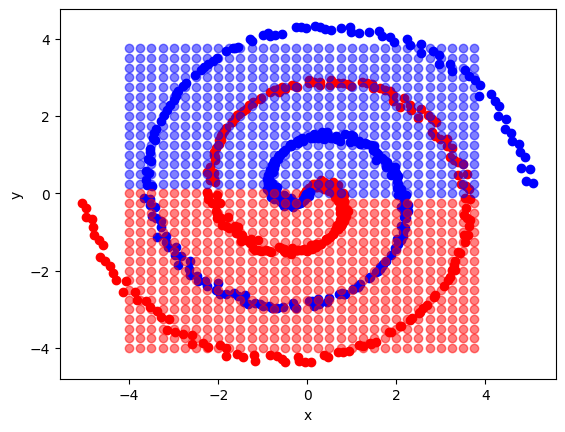

In [ ]:
plt.scatter(getCoords(points, 1, "x"), getCoords(points, 1, "y"), color='red')
plt.scatter(getCoords(points, -1, "x"), getCoords(points, -1, "y"), color='blue')

i = -4
while (i < 4):
  j = -4
  while (j < 4):
    if scalar(w, [i, j]) > 0:
      plt.scatter(i, j, color='red', alpha=0.5)
    else:
      plt.scatter(i, j, color='blue', alpha=0.5)
    j += 0.25
  i += 0.25

plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:

q = 0.25
numPerc = 10
w = 2 * np.random.random((numPerc, 2)) - 1
n = 0
for n in range(allNum * 3):
  for i in range(numPerc):
    x = [points[n % allNum]["x"], points[n % allNum]["y"]]
    if (points[n % allNum]["label"] == 1 and scalar(w[i], x) > 0) or (points[n % allNum]["label"] == -1 and scalar(w[i], x) <= 0):
      continue
    elif points[n % allNum]["label"] == -1:
      w[i] = np.array(w[i]) - q * np.array(x)
    else:
      w[i] = np.array(w[i]) + q * np.array(x)

In [ ]:
def predictEnsemble(x,y):
  pred = [scalar(w[i],[x,y]) for i in range(numPerc)]
  return 1 if sum(pred) > 0 else 0

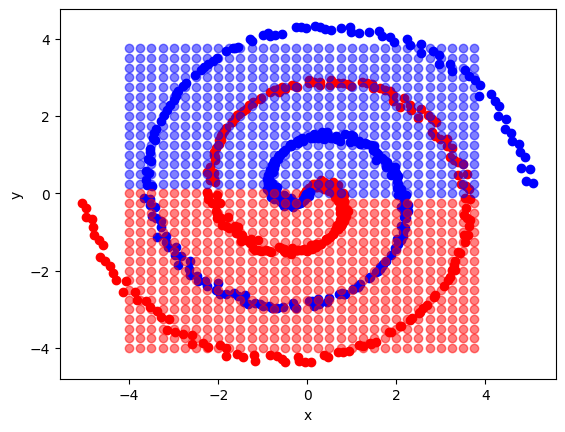

In [ ]:
plt.scatter(getCoords(points, 1, "x"), getCoords(points, 1, "y"), color='red')
plt.scatter(getCoords(points, -1, "x"), getCoords(points, -1, "y"), color='blue')

i = -4
while (i < 4):
  j = -4
  while (j < 4):
    if predictEnsemble(i,j) > 0:
      plt.scatter(i, j, color='red', alpha=0.5)
    else:
      plt.scatter(i, j, color='blue', alpha=0.5)
    j += 0.25
  i += 0.25

plt.xlabel('x')
plt.ylabel('y')
plt.show()